<h1>Plant Recognition using Convolutional Neural Network.</h1>

## *Problem Statement*:
Recognition of whether the input image of the plant is rice or wheat.

## *Authors*:
<ul>
    <li>Nour Bahaa</li>
    <li>Mai Mahmoud</li>
    <li>Ibrahim Fawzy</li>
    <li>Abanoub George</li>
</ul>

## *Supervisors*:
<ul>
    <li>Prof. Khaled Hussien</li>
    <li>Eng. Hager Sobeah</li>
    <li>Eng. Nour el-huda Ashraf</li>
</ul>



### Importing main libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


### Preprocessing on Trainning set (*Image Augmentation*)
We are applying some geometerical tranformation to move the pixel to prevent overfitting(Zoom In, Zoom Out, Rotations). 

In [4]:
train_datagenarator = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

trainning_set = train_datagenarator.flow_from_directory('dataset/trainning_set',
                                                         target_size = (64, 64),
                                                         batch_size = 15,
                                                         class_mode = 'binary')

Found 252 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagenarator = ImageDataGenerator(rescale = 1./255)
test_set = test_datagenarator.flow_from_directory('dataset/test_set',
                                                   target_size = (64, 64),
                                                   batch_size = 5,
                                                   class_mode = 'binary')

Found 113 images belonging to 2 classes.


### CNN init

In [6]:
cnn = tf.keras.models.Sequential()

###  Convolution Layer
Feature Mapping (Applying filters)

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[64, 64, 3]))

###  Pooling Layer (Max Pooling)
Detect the features in any postition, background, light, texture and pattern

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer & poolin layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening
Rotate the matrix to a column matrix for future use of the ANN

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection
Matching the features with the classes to make a prediction. (units= Hidden Neurons)

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

###  Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the CNN
We use Adam Optimizer to update network weights iterative based in training data.

In [13]:
cnn.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

### Trainning the CNN on the Trainning set and evaluating it on the Test set

In [14]:
history = cnn.fit(x = trainning_set,
                  validation_data = test_set,
                  epochs = 10)

Train for 17 steps, validate for 23 steps
Epoch 1/10
17/17 [==============================] - 6s 381ms/step - loss: 0.6278 - accuracy: 0.6429 - val_loss: 0.7700 - val_accuracy: 0.5752
Epoch 2/10
17/17 [==============================] - 5s 292ms/step - loss: 0.4775 - accuracy: 0.7619 - val_loss: 0.6295 - val_accuracy: 0.6991
Epoch 3/10
17/17 [==============================] - 5s 273ms/step - loss: 0.3830 - accuracy: 0.8373 - val_loss: 0.9203 - val_accuracy: 0.6372
Epoch 4/10
17/17 [==============================] - 5s 278ms/step - loss: 0.2982 - accuracy: 0.8889 - val_loss: 0.7301 - val_accuracy: 0.6726
Epoch 5/10
17/17 [==============================] - 5s 289ms/step - loss: 0.2334 - accuracy: 0.9127 - val_loss: 0.6184 - val_accuracy: 0.7434
Epoch 6/10
17/17 [==============================] - 5s 293ms/step - loss: 0.1812 - accuracy: 0.9206 - val_loss: 0.7652 - val_accuracy: 0.7522
Epoch 7/10
17/17 [==============================] - 5s 286ms/step - loss: 0.1286 - accuracy: 0.9484 - val_

### Getting the Average accuracy among all the stages (epochs)

In [15]:
Avg_Acc = np.mean(history.history['accuracy'])
print(round(Avg_Acc * 100,2),' %')

87.78  %


### Printing the Accuracy

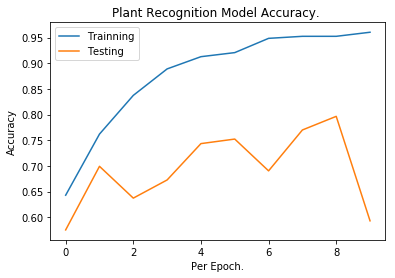

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plant Recognition Model Accuracy. ')
plt.xlabel('Per Epoch.')
plt.ylabel('Accuracy')
plt.legend(['Trainning', 'Testing'], loc='upper left')
plt.show()

##  Making a prediction

In [18]:
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/wheat_or_rice_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Wheat Plant.'
else:
  prediction = 'Rice Plant.'

In [19]:
print(prediction)

Wheat Plant.


<center><b>End of Notebook.</b></center>